In [4]:
# ============================================================================
# 🎯 PROJET 3 - STRATÉGIES CAMPAGNES MARKETING CIBLÉES
# ============================================================================
# 📊 Exploitation des segments RFM + Clustering pour ROI marketing optimal
# 💰 Objectif: Maximiser conversions et revenus par segment
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration affichage
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("🎯 PROJET 3 - CAMPAGNES MARKETING STRATEGY")
print("=" * 60)

# ============================================================================
# 📥 1. CHARGEMENT DES SEGMENTS SAUVEGARDÉS
# ============================================================================

def load_segments_data():
    """
    📥 Chargement des segments créés dans le Projet 2
    """
    print("📥 CHARGEMENT DES SEGMENTS...")
    
    # Chemins de vos données
    segments_dir = "C:/Users/Moi/E-commerce_Marketing_Analytics/data/processed/segments"
    campaigns_dir = "C:/Users/Moi/E-commerce_Marketing_Analytics/data/processed/campaigns"
    
    # Chargement segments complets
    segments_complete = pd.read_pickle(f"{segments_dir}/customer_segments_complete.pkl")
    print(f"✅ Segments complets: {len(segments_complete):,} clients")
    
    # Chargement segments prioritaires
    priority_segments = {}
    
    segment_files = [
        'champions', 'super_whales', 'high_value', 
        'potential_loyalists', 'one_shot_problem'
    ]
    
    for segment in segment_files:
        try:
            data = pd.read_pickle(f"{campaigns_dir}/target_{segment}.pkl")
            priority_segments[segment.upper()] = data
            print(f"✅ {segment.upper()}: {len(data):,} clients")
        except FileNotFoundError:
            print(f"⚠️  {segment.upper()}: Fichier non trouvé")
    
    # Résumé stratégique
    try:
        campaign_summary = pd.read_pickle(f"{campaigns_dir}/campaign_strategy_summary.pkl")
        print(f"✅ Résumé stratégique chargé")
    except FileNotFoundError:
        print(f"⚠️  Résumé stratégique non trouvé")
        campaign_summary = None
    
    return segments_complete, priority_segments, campaign_summary

# 🚀 CHARGEMENT
segments_data, priority_segments, strategy_summary = load_segments_data()

print(f"\n📊 SEGMENTS DISPONIBLES POUR CAMPAGNES:")
for segment, data in priority_segments.items():
    ca_total = data['Monetary'].sum()
    ca_moyen = data['Monetary'].mean()
    print(f"🎯 {segment}: {len(data):,} clients | CA: ${ca_total:,.0f} | Moy: ${ca_moyen:.0f}")


🎯 PROJET 3 - CAMPAGNES MARKETING STRATEGY
📥 CHARGEMENT DES SEGMENTS...
✅ Segments complets: 248,138 clients
✅ CHAMPIONS: 37,392 clients
✅ SUPER_WHALES: 19 clients
✅ HIGH_VALUE: 3,051 clients
✅ POTENTIAL_LOYALISTS: 52,557 clients
✅ ONE_SHOT_PROBLEM: 238,928 clients
✅ Résumé stratégique chargé

📊 SEGMENTS DISPONIBLES POUR CAMPAGNES:
🎯 CHAMPIONS: 37,392 clients | CA: $17,044,145 | Moy: $456
🎯 SUPER_WHALES: 19 clients | CA: $3,502,897 | Moy: $184363
🎯 HIGH_VALUE: 3,051 clients | CA: $12,081,383 | Moy: $3960
🎯 POTENTIAL_LOYALISTS: 52,557 clients | CA: $897,004 | Moy: $17
🎯 ONE_SHOT_PROBLEM: 238,928 clients | CA: $4,851,217 | Moy: $20


In [5]:
# ============================================================================
# 🎯 2. ANALYSE POTENTIEL CAMPAGNES PAR SEGMENT
# ============================================================================

def analyze_campaign_potential():
    """
    📊 Calcul du potentiel marketing par segment
    """
    print("\n📊 ANALYSE POTENTIEL CAMPAGNES...")
    
    campaign_analysis = []
    
    for segment_name, segment_data in priority_segments.items():
        
        # Métriques de base
        n_clients = len(segment_data)
        ca_total = segment_data['Monetary'].sum()
        ca_moyen = segment_data['Monetary'].mean()
        freq_moyenne = segment_data['Frequency'].mean()
        recence_moyenne = segment_data['Recency'].mean()
        
        # 💰 Estimation coûts et ROI par segment
        if 'CHAMPIONS' in segment_name:
            cout_acquisition = 50  # Premium
            taux_conversion = 0.25
            campagne_type = "🥇 Programme VIP"
        elif 'SUPER_WHALES' in segment_name:
            cout_acquisition = 200  # B2B personnalisé
            taux_conversion = 0.40
            campagne_type = "👑 Approche B2B premium"
        elif 'HIGH_VALUE' in segment_name:
            cout_acquisition = 80
            taux_conversion = 0.20
            campagne_type = "🎯 Fidélisation premium"
        elif 'POTENTIAL_LOYALISTS' in segment_name:
            cout_acquisition = 30
            taux_conversion = 0.15
            campagne_type = "🚀 Nurturing séquentiel"
        else:  # ONE_SHOT_PROBLEM
            cout_acquisition = 15
            taux_conversion = 0.08
            campagne_type = "⚠️  Réactivation massive"
        
        # Calculs ROI
        conversions_estimees = n_clients * taux_conversion
        cout_total_campagne = n_clients * cout_acquisition
        revenus_estimes = conversions_estimees * ca_moyen
        roi = ((revenus_estimes - cout_total_campagne) / cout_total_campagne) * 100
        
        campaign_analysis.append({
            'Segment': segment_name,
            'Clients': n_clients,
            'CA_Actuel': ca_total,
            'CA_Moyen': ca_moyen,
            'Frequence_Moy': freq_moyenne,
            'Recence_Moy': recence_moyenne,
            'Cout_Acquisition': cout_acquisition,
            'Taux_Conv_Estime': taux_conversion,
            'Conversions_Estimees': int(conversions_estimees),
            'Cout_Total_Campagne': cout_total_campagne,
            'Revenus_Estimes': revenus_estimes,
            'ROI_Estime': roi,
            'Campagne_Type': campagne_type,
            'Priorite_Score': roi * np.log(n_clients)  # Score priorité
        })
    
    # DataFrame résultats
    campaigns_df = pd.DataFrame(campaign_analysis)
    campaigns_df = campaigns_df.sort_values('ROI_Estime', ascending=False)
    
    return campaigns_df

# 🚀 ANALYSE
campaign_potential = analyze_campaign_potential()

print("\n🎯 POTENTIEL CAMPAGNES PAR SEGMENT:")
display_cols = ['Segment', 'Clients', 'ROI_Estime', 'Revenus_Estimes', 'Campagne_Type']
print(campaign_potential[display_cols].to_string(index=False))



📊 ANALYSE POTENTIEL CAMPAGNES...

🎯 POTENTIEL CAMPAGNES PAR SEGMENT:
            Segment  Clients  ROI_Estime  Revenus_Estimes            Campagne_Type
       SUPER_WHALES       19    36772.60       1401158.64   👑 Approche B2B premium
         HIGH_VALUE     3051      889.95       2416276.66   🎯 Fidélisation premium
          CHAMPIONS    37392      127.91       4261036.17          🥇 Programme VIP
   ONE_SHOT_PROBLEM   238928      -89.17        388097.38 ⚠️  Réactivation massive
POTENTIAL_LOYALISTS    52557      -91.47        134550.54   🚀 Nurturing séquentiel



🎨 CRÉATION DASHBOARDS CAMPAGNES...


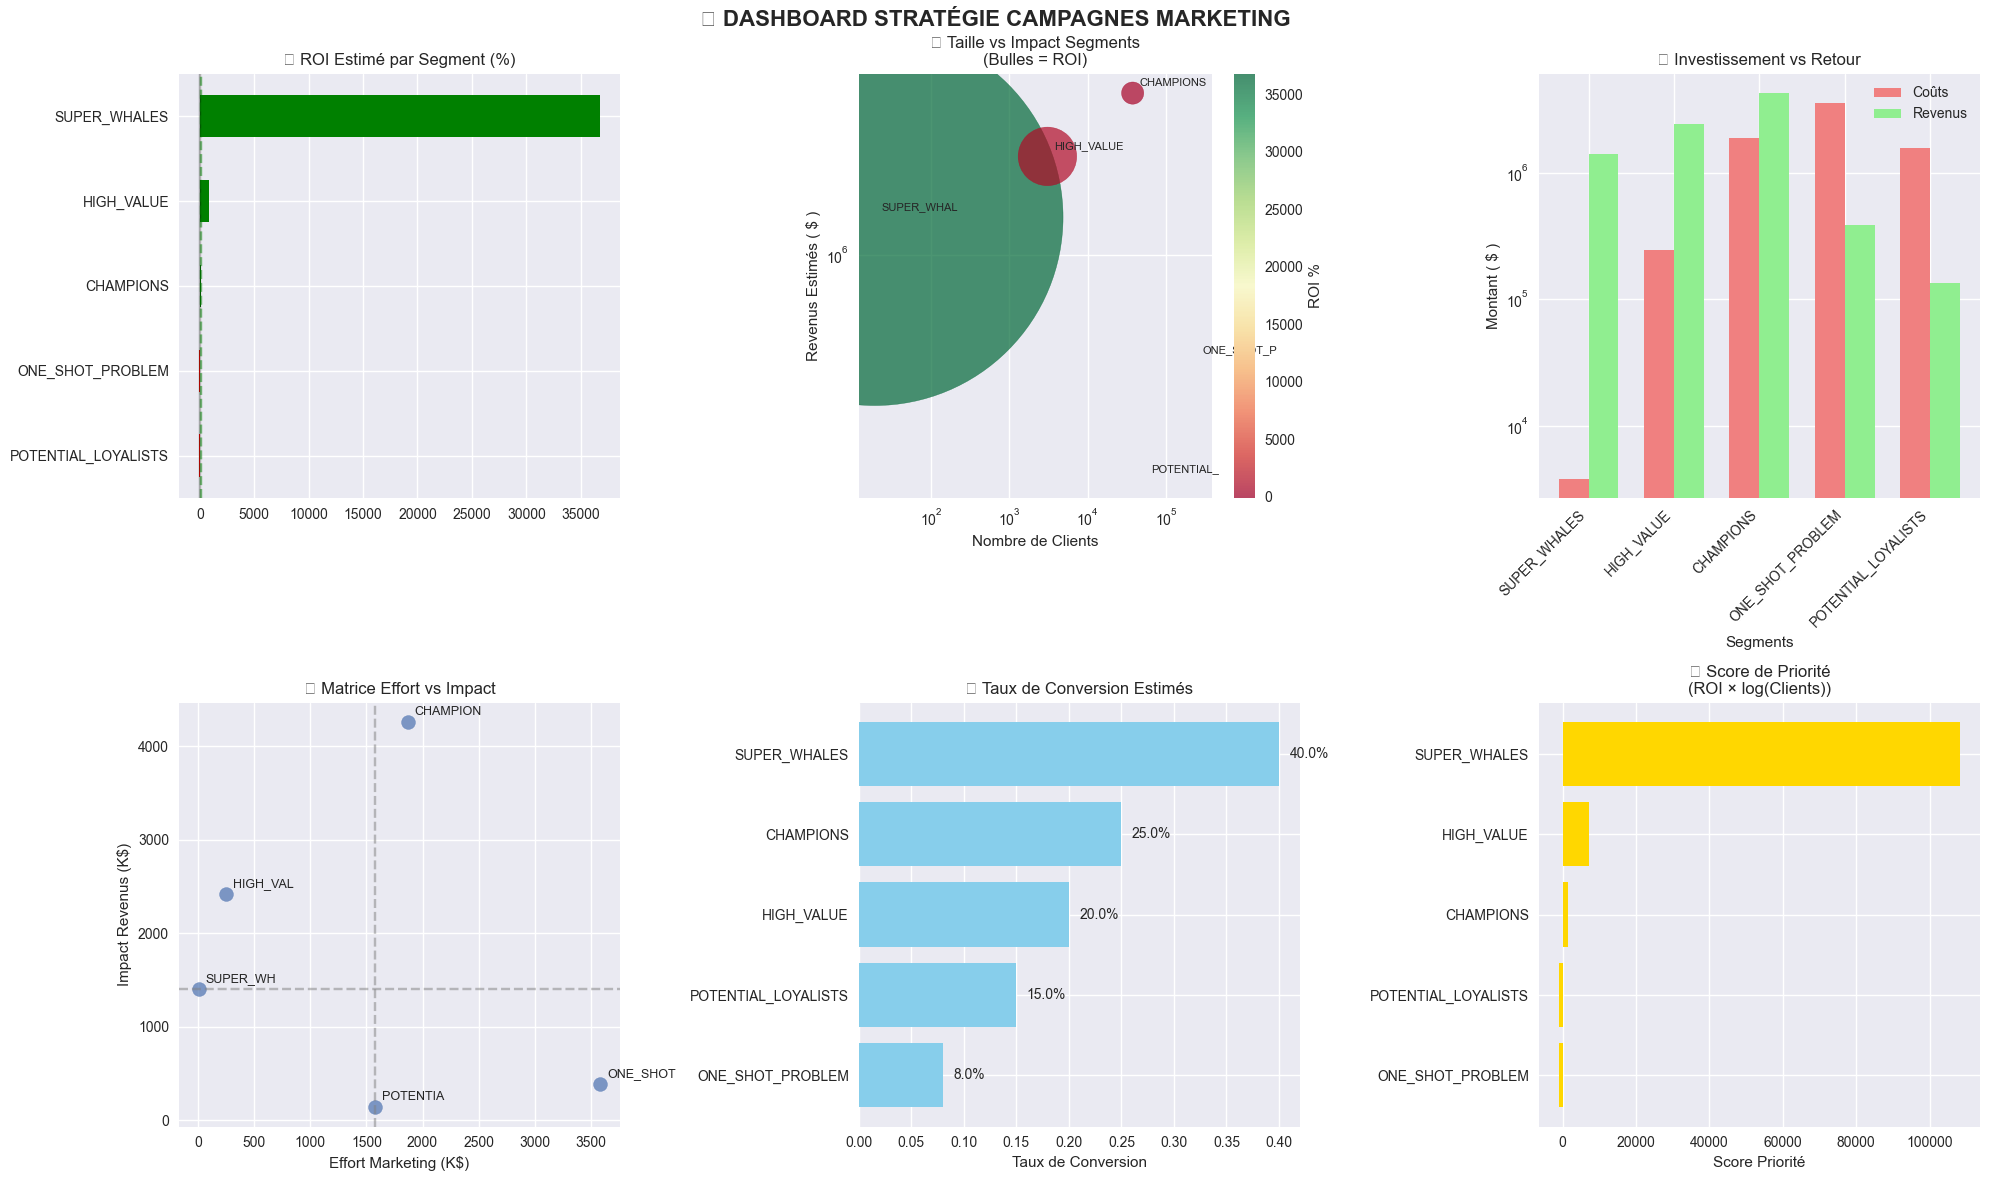


📅 CRÉATION PLANNING CAMPAGNES...


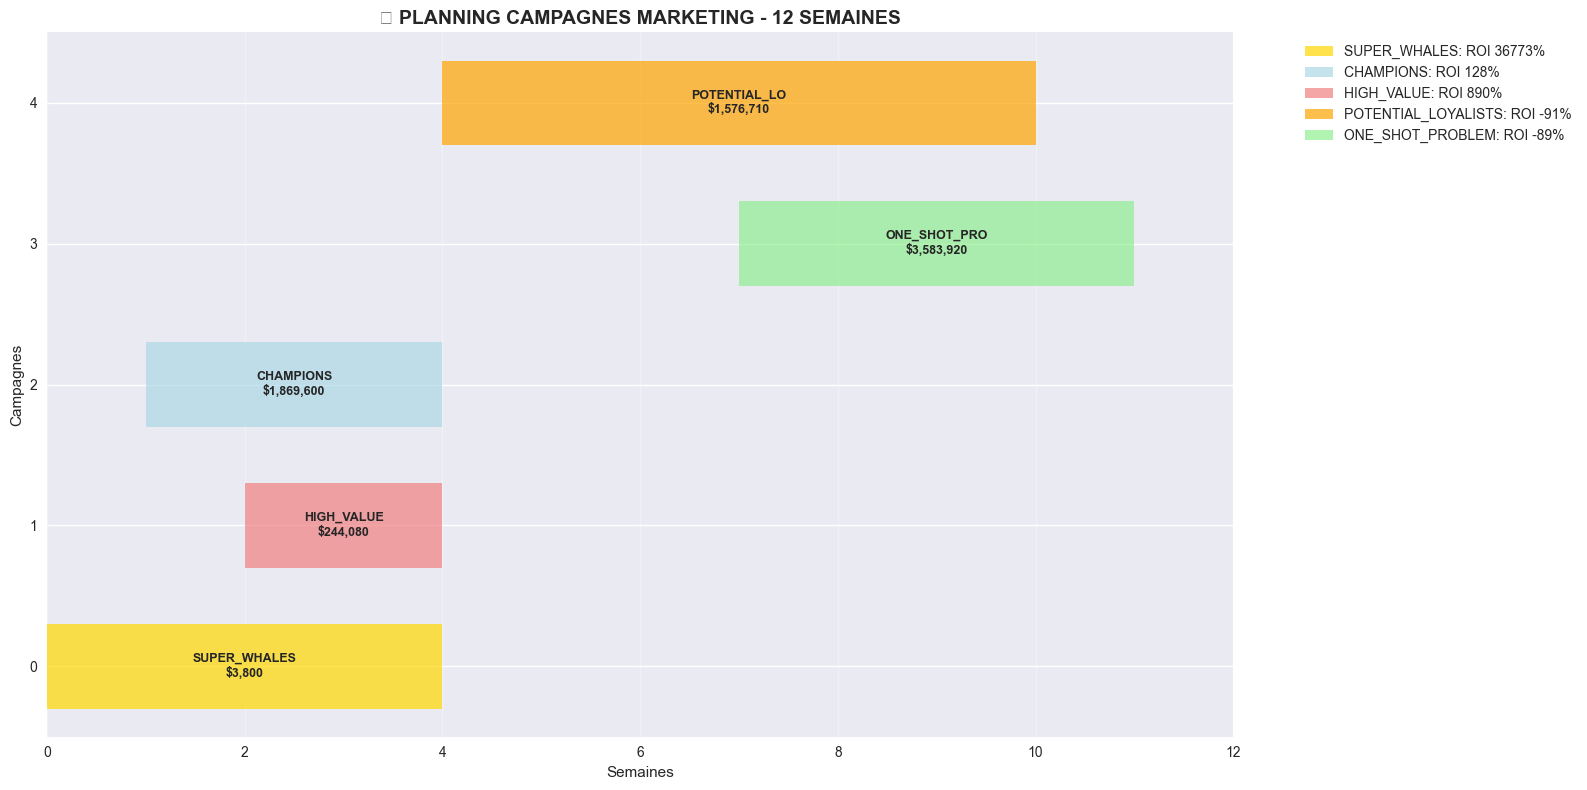


📅 PLANNING CAMPAGNES:
            Segment Date_Debut   Date_Fin  Budget_Requis  ROI_Attendu            Type_Campagne
       SUPER_WHALES 2025-07-20 2025-08-17           3800     36772.60   👑 Approche B2B premium
          CHAMPIONS 2025-07-27 2025-08-17        1869600       127.91          🥇 Programme VIP
         HIGH_VALUE 2025-08-03 2025-08-17         244080       889.95   🎯 Fidélisation premium
POTENTIAL_LOYALISTS 2025-08-17 2025-09-28        1576710       -91.47   🚀 Nurturing séquentiel
   ONE_SHOT_PROBLEM 2025-09-07 2025-10-05        3583920       -89.17 ⚠️  Réactivation massive

💌 CRÉATION TEMPLATES MESSAGES...

💌 TEMPLATES CRÉÉS POUR 5 SEGMENTS:

🎯 SUPER_WHALES:
   📧 Sujet: 🔥 Offre Exclusive VIP - Compte dédié activé
   💰 Coût/message: $200
   📱 Canal: Email + Appel téléphonique
   🔗 CTA: 📞 Contactez votre Account Manager

🎯 CHAMPIONS:
   📧 Sujet: 🏆 Club Champions - Vos privilèges vous attendent!
   💰 Coût/message: $50
   📱 Canal: Email + SMS de rappel
   🔗 CTA: 🛒 Profiter de 

In [8]:
# ============================================================================
# 🎨 3. VISUALISATIONS ROI ET POTENTIEL CAMPAGNES
# ============================================================================

def create_campaign_dashboards(campaigns_df):
    """
    📊 Dashboards visuels pour aide à la décision marketing
    """
    print("\n🎨 CRÉATION DASHBOARDS CAMPAGNES...")
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('🎯 DASHBOARD STRATÉGIE CAMPAGNES MARKETING', fontsize=16, fontweight='bold')
    
    # 1. ROI par segment (Barres horizontales)
    ax1 = axes[0, 0]
    roi_data = campaigns_df.sort_values('ROI_Estime')
    colors = ['red' if x < 0 else 'green' if x > 100 else 'orange' for x in roi_data['ROI_Estime']]
    roi_data['ROI_Estime'].plot(kind='barh', ax=ax1, color=colors)
    ax1.set_title('💰 ROI Estimé par Segment (%)')
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax1.axvline(x=100, color='green', linestyle='--', alpha=0.5, label='ROI +100%')
    ax1.set_yticklabels(roi_data['Segment'], rotation=0)
    
    # 2. Clients vs Revenus estimés (Scatter)
    ax2 = axes[0, 1]
    scatter = ax2.scatter(campaigns_df['Clients'], campaigns_df['Revenus_Estimes'], 
                         s=campaigns_df['ROI_Estime']*2, alpha=0.7, c=campaigns_df['ROI_Estime'], 
                         cmap='RdYlGn')
    ax2.set_xlabel('Nombre de Clients')
    ax2.set_ylabel('Revenus Estimés ( $ )')
    ax2.set_title('🎯 Taille vs Impact Segments\n(Bulles = ROI)')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    plt.colorbar(scatter, ax=ax2, label='ROI %')
    
    # Annotations segments
    for idx, row in campaigns_df.iterrows():
        ax2.annotate(row['Segment'][:10], (row['Clients'], row['Revenus_Estimes']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 3. Coûts vs Revenus par segment
    ax3 = axes[0, 2]
    x = np.arange(len(campaigns_df))
    width = 0.35
    
    ax3.bar(x - width/2, campaigns_df['Cout_Total_Campagne'], width, label='Coûts', color='lightcoral')
    ax3.bar(x + width/2, campaigns_df['Revenus_Estimes'], width, label='Revenus', color='lightgreen')
    ax3.set_title('💲 Investissement vs Retour')
    ax3.set_xlabel('Segments')
    ax3.set_ylabel('Montant ( $ )')
    ax3.set_xticks(x)
    ax3.set_xticklabels(campaigns_df['Segment'], rotation=45, ha='right')
    ax3.legend()
    ax3.set_yscale('log')
    
    # 4. Matrice Effort vs Impact
    ax4 = axes[1, 0]
    effort = campaigns_df['Cout_Total_Campagne'] / 1000  # En milliers
    impact = campaigns_df['Revenus_Estimes'] / 1000
    
    ax4.scatter(effort, impact, s=100, alpha=0.7)
    ax4.set_xlabel('Effort Marketing (K$)')
    ax4.set_ylabel('Impact Revenus (K$)')
    ax4.set_title('🎯 Matrice Effort vs Impact')
    
    # Quadrants
    ax4.axhline(y=impact.median(), color='gray', linestyle='--', alpha=0.5)
    ax4.axvline(x=effort.median(), color='gray', linestyle='--', alpha=0.5)
    
    # Labels segments
    for idx, row in campaigns_df.iterrows():
        ax4.annotate(row['Segment'][:8], 
                    (row['Cout_Total_Campagne']/1000, row['Revenus_Estimes']/1000),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    # 5. Taux de conversion par segment
    ax5 = axes[1, 1]
    conversion_data = campaigns_df.sort_values('Taux_Conv_Estime', ascending=True)
    bars = ax5.barh(conversion_data['Segment'], conversion_data['Taux_Conv_Estime'], 
                   color='skyblue')
    ax5.set_title('🎯 Taux de Conversion Estimés')
    ax5.set_xlabel('Taux de Conversion')
    
    # Ajout des valeurs sur les barres
    for bar in bars:
        width = bar.get_width()
        ax5.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.1%}', ha='left', va='center')
    
    # 6. Score de priorité (ROI pondéré par taille)
    ax6 = axes[1, 2]
    priority_data = campaigns_df.sort_values('Priorite_Score', ascending=True)
    bars = ax6.barh(priority_data['Segment'], priority_data['Priorite_Score'], 
                   color='gold')
    ax6.set_title('⭐ Score de Priorité\n(ROI × log(Clients))')
    ax6.set_xlabel('Score Priorité')
    
    plt.tight_layout()
    return fig

# 🚀 GÉNÉRATION DASHBOARDS
campaign_viz = create_campaign_dashboards(campaign_potential)
plt.show()

# ============================================================================
# 📅 4. PLANNING CAMPAGNES OPTIMISÉ
# ============================================================================

def create_campaign_calendar(campaigns_df):
    """
    📅 Planning optimal des campagnes marketing
    """
    print("\n📅 CRÉATION PLANNING CAMPAGNES...")
    
    # Tri par priorité (ROI décroissant)
    campaigns_sorted = campaigns_df.sort_values('ROI_Estime', ascending=False)
    
    # Définition planning sur 12 semaines
    planning = []
    start_date = datetime.now()
    
    for idx, (_, campaign) in enumerate(campaigns_sorted.iterrows()):
        
        # Détermination timing selon segment
        if 'SUPER_WHALES' in campaign['Segment']:
            semaine_debut = 1  # Priorité absolue
            duree = 4  # Campagne longue personnalisée
        elif 'CHAMPIONS' in campaign['Segment']:
            semaine_debut = 2
            duree = 3
        elif 'HIGH_VALUE' in campaign['Segment']:
            semaine_debut = 3
            duree = 2
        elif 'POTENTIAL_LOYALISTS' in campaign['Segment']:
            semaine_debut = 5
            duree = 6  # Nurturing long
        else:  # ONE_SHOT_PROBLEM
            semaine_debut = 8
            duree = 4  # Campagne masse
        
        date_debut = start_date + timedelta(weeks=semaine_debut-1)
        date_fin = date_debut + timedelta(weeks=duree)
        
        planning.append({
            'Segment': campaign['Segment'],
            'Date_Debut': date_debut.strftime('%Y-%m-%d'),
            'Date_Fin': date_fin.strftime('%Y-%m-%d'),
            'Semaine_Debut': semaine_debut,
            'Duree_Semaines': duree,
            'Budget_Requis': campaign['Cout_Total_Campagne'],
            'ROI_Attendu': campaign['ROI_Estime'],
            'Revenus_Cibles': campaign['Revenus_Estimes'],
            'Clients_Cibles': campaign['Clients'],
            'Type_Campagne': campaign['Campagne_Type'],
            'Priorite_Exec': idx + 1
        })
    
    planning_df = pd.DataFrame(planning)
    planning_df = planning_df.sort_values('Semaine_Debut')
    
    # Visualisation timeline
    fig, ax = plt.subplots(figsize=(16, 8))
    
    colors = ['gold', 'lightcoral', 'lightblue', 'lightgreen', 'orange']
    
    for idx, campaign in planning_df.iterrows():
        debut = campaign['Semaine_Debut']
        duree = campaign['Duree_Semaines']
        
        ax.barh(idx, duree, left=debut-1, height=0.6, 
               color=colors[idx % len(colors)], alpha=0.7,
               label=campaign['Segment'])
        
        # Annotation segment + budget
        ax.text(debut-1 + duree/2, idx, 
               f"{campaign['Segment'][:12]}\n${campaign['Budget_Requis']:,.0f}", 
               ha='center', va='center', fontsize=9, fontweight='bold')
    
    ax.set_xlabel('Semaines')
    ax.set_ylabel('Campagnes')
    ax.set_title('📅 PLANNING CAMPAGNES MARKETING - 12 SEMAINES', 
                fontsize=14, fontweight='bold')
    ax.set_xlim(0, 12)
    ax.set_ylim(-0.5, len(planning_df)-0.5)
    ax.grid(axis='x', alpha=0.3)
    
    # Légende avec ROI
    legend_labels = [f"{row['Segment']}: ROI {row['ROI_Attendu']:.0f}%" 
                    for _, row in planning_df.iterrows()]
    ax.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    return planning_df

# 🚀 GÉNÉRATION PLANNING
campaign_calendar = create_campaign_calendar(campaign_potential)

print("\n📅 PLANNING CAMPAGNES:")
display_planning = campaign_calendar[['Segment', 'Date_Debut', 'Date_Fin', 
                                    'Budget_Requis', 'ROI_Attendu', 'Type_Campagne']]
print(display_planning.to_string(index=False))

# ============================================================================
# 💌 5. TEMPLATES MESSAGES PERSONNALISÉS PAR SEGMENT
# ============================================================================

def create_message_templates():
    """
    💌 Templates d'emails/messages personnalisés par segment
    """
    print("\n💌 CRÉATION TEMPLATES MESSAGES...")
    
    templates = {
        'SUPER_WHALES': {
            'Sujet': "🔥 Offre Exclusive VIP - Compte dédié activé",
            'Message': """
            Cher Client Premium,
            
            🎯 Vous faites partie de nos 19 clients les plus stratégiques!
            
            ✨ AVANTAGES EXCLUSIFS ACTIVÉS:
            • 👨‍💼 Account Manager dédié (ligne directe)
            • 🚀 Livraisons express GRATUITES à vie  
            • 💎 Accès prioritaire nouveautés & collections
            • 🎁 Programme cadeaux sur-mesure (min. 15% de vos achats)
            
            📞 Votre contact direct: manager.vip@entreprise.com
            
            Cordialement,
            L'équipe VIP Experience
            """,
            'Call_to_Action': '📞 Contactez votre Account Manager',
            'Budget_Message': 200,  # Coût par message personnalisé
            'Canal_Principal': 'Email + Appel téléphonique'
        },
        
        'CHAMPIONS': {
            'Sujet': "🏆 Club Champions - Vos privilèges vous attendent!",
            'Message': """
            Bonjour Champion,
            
            🏆 Félicitations! Vous êtes dans le TOP 10% de nos clients fidèles!
            
            🎁 VOS PRIVILÈGES CHAMPIONS:
            • 🛍️  -20% permanent sur TOUT le catalogue
            • 🚀 Livraisons express gratuites (48h max)
            • ⭐ Support client prioritaire 
            • 🎯 Invitations événements privés
            
            💫 Offre spéciale cette semaine: -30% sur votre wishlist!
            
            Profitez-en vite!
            L'équipe Champions
            """,
            'Call_to_Action': '🛒 Profiter de mes -30%',
            'Budget_Message': 50,
            'Canal_Principal': 'Email + SMS de rappel'
        },
        
        'HIGH_VALUE': {
            'Sujet': "💎 Collection Premium - Accès anticipé activé",
            'Message': """
            Bonjour,
            
            💎 En tant que client Premium, découvrez EN AVANT-PREMIÈRE:
            
            ✨ NOUVELLE COLLECTION AUTOMNE
            • 🎯 Sélection premium exclusive 
            • 👗 Pièces limitées (stock réduit)
            • 💳 Paiement en 3x sans frais
            • 📦 Emballage premium offert
            
            ⏰ Accès exclusif jusqu'au [DATE+3j], puis ouverture au public.
            
            À très bientôt,
            L'équipe Collections
            """,
            'Call_to_Action': '👀 Découvrir la collection',
            'Budget_Message': 80,
            'Canal_Principal': 'Email premium + Retargeting'
        },
        
        'POTENTIAL_LOYALISTS': {
            'Sujet': "🚀 On vous a préparé quelque chose...",
            'Message': """
            Salut!
            
            🎯 On a remarqué que vous aimez nos produits!
            
            💡 POUR VOUS REMERCIER:
            • 🎁 Code -15% : MERCI15
            • 📦 Livraison offerte dès 50€
            • ⭐ Programme fidélité: 1€ = 1 point
            • 💬 Conseils personnalisés par chat
            
            🔥 + BONUS: Parrainez un ami = -20% pour vous 2!
            
            L'aventure ne fait que commencer 😉
            L'équipe
            """,
            'Call_to_Action': '🎁 Utiliser mon code MERCI15',
            'Budget_Message': 30,
            'Canal_Principal': 'Email + SMS + Social Media'
        },
        
        'ONE_SHOT_PROBLEM': {
            'Sujet': "⏰ On vous offre une 2ème chance!",
            'Message': """
            Hello!
            
            🤔 Ça fait un moment... Tout va bien?
            
            🎁 ON VOUS OFFRE UNE 2ÈME CHANCE:
            • 💸 -25% sur TOUT (code: RETOUR25)
            • 📦 Livraison offerte (même 1 produit!)
            • 💳 Paiement à réception possible
            • 🔄 Retours gratuits 30 jours
            
            ⏰ Offre limitée à 72h. Après, elle disparaît...
            
            On espère vous revoir bientôt!
            L'équipe
            """,
            'Call_to_Action': '🛒 Revenir avec -25%',
            'Budget_Message': 15,
            'Canal_Principal': 'Email + Pub Facebook/Instagram'
        }
    }
    
    return templates

# 🚀 GÉNÉRATION TEMPLATES
message_templates = create_message_templates()

print("\n💌 TEMPLATES CRÉÉS POUR 5 SEGMENTS:")
for segment, template in message_templates.items():
    print(f"\n🎯 {segment}:")
    print(f"   📧 Sujet: {template['Sujet']}")
    print(f"   💰 Coût/message: ${template['Budget_Message']}")
    print(f"   📱 Canal: {template['Canal_Principal']}")
    print(f"   🔗 CTA: {template['Call_to_Action']}")

In [9]:
# ============================================================================
# 🎯 2. ANALYSE POTENTIEL CAMPAGNES PAR SEGMENT
# ============================================================================

def analyze_campaign_potential():
    """
    📊 Calcul du potentiel marketing par segment
    """
    print("\n📊 ANALYSE POTENTIEL CAMPAGNES...")
    
    campaign_analysis = []
    
    for segment_name, segment_data in priority_segments.items():
        
        # Métriques de base
        n_clients = len(segment_data)
        ca_total = segment_data['Monetary'].sum()
        ca_moyen = segment_data['Monetary'].mean()
        freq_moyenne = segment_data['Frequency'].mean()
        recence_moyenne = segment_data['Recency'].mean()
        
        # 💰 Estimation coûts et ROI par segment
        if 'CHAMPIONS' in segment_name:
            cout_acquisition = 50  # Premium
            taux_conversion = 0.25
            campagne_type = "🥇 Programme VIP"
        elif 'SUPER_WHALES' in segment_name:
            cout_acquisition = 200  # B2B personnalisé
            taux_conversion = 0.40
            campagne_type = "👑 Approche B2B premium"
        elif 'HIGH_VALUE' in segment_name:
            cout_acquisition = 80
            taux_conversion = 0.20
            campagne_type = "🎯 Fidélisation premium"
        elif 'POTENTIAL_LOYALISTS' in segment_name:
            cout_acquisition = 30
            taux_conversion = 0.15
            campagne_type = "🚀 Nurturing séquentiel"
        else:  # ONE_SHOT_PROBLEM
            cout_acquisition = 15
            taux_conversion = 0.08
            campagne_type = "⚠️  Réactivation massive"
        
        # Calculs ROI
        conversions_estimees = n_clients * taux_conversion
        cout_total_campagne = n_clients * cout_acquisition
        revenus_estimes = conversions_estimees * ca_moyen
        roi = ((revenus_estimes - cout_total_campagne) / cout_total_campagne) * 100
        
        campaign_analysis.append({
            'Segment': segment_name,
            'Clients': n_clients,
            'CA_Actuel': ca_total,
            'CA_Moyen': ca_moyen,
            'Frequence_Moy': freq_moyenne,
            'Recence_Moy': recence_moyenne,
            'Cout_Acquisition': cout_acquisition,
            'Taux_Conv_Estime': taux_conversion,
            'Conversions_Estimees': int(conversions_estimees),
            'Cout_Total_Campagne': cout_total_campagne,
            'Revenus_Estimes': revenus_estimes,
            'ROI_Estime': roi,
            'Campagne_Type': campagne_type,
            'Priorite_Score': roi * np.log(n_clients)  # Score priorité
        })
    
    # DataFrame résultats
    campaigns_df = pd.DataFrame(campaign_analysis)
    campaigns_df = campaigns_df.sort_values('ROI_Estime', ascending=False)
    
    return campaigns_df

# 🚀 ANALYSE
campaign_potential = analyze_campaign_potential()

print("\n🎯 POTENTIEL CAMPAGNES PAR SEGMENT:")
display_cols = ['Segment', 'Clients', 'ROI_Estime', 'Revenus_Estimes', 'Campagne_Type']
print(campaign_potential[display_cols].to_string(index=False))



📊 ANALYSE POTENTIEL CAMPAGNES...

🎯 POTENTIEL CAMPAGNES PAR SEGMENT:
            Segment  Clients  ROI_Estime  Revenus_Estimes            Campagne_Type
       SUPER_WHALES       19    36772.60       1401158.64   👑 Approche B2B premium
         HIGH_VALUE     3051      889.95       2416276.66   🎯 Fidélisation premium
          CHAMPIONS    37392      127.91       4261036.17          🥇 Programme VIP
   ONE_SHOT_PROBLEM   238928      -89.17        388097.38 ⚠️  Réactivation massive
POTENTIAL_LOYALISTS    52557      -91.47        134550.54   🚀 Nurturing séquentiel
